# **Author: Sri Sudheera Chitipolu**

### *Github: https://github.com/sudheera96*

## Acquire the Data

Collected data from kaggle

*https://www.kaggle.com/hellbuoy/car-price-prediction*

## General Description: 
For understanding pricing dynamics of the new market in the different cars for business growth, we will predict the car’s prices depending on different independent variables. 

## Importing the dataset

In [1]:
import pandas as pd # imported pandas as pd
cp_data = pd.read_csv("carPrice_Assignment.csv") # pulled data from csv file to pandas dataframe
print(cp_data.keys()) # display a list of the names of the fields
cp_data.head(10) # table display of the first few lines in the DataFrame

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## _Notes_
In inital_exploration we have seen there are features with negative correlated with target variable. So we are droping them from data set

In [2]:
df = cp_data.drop(columns=["car_ID","CarName","highwaympg","citympg","peakrpm","symboling"])

In [3]:
df_obj_cols = df.select_dtypes(include = 'object')
df_num_cols = df.select_dtypes(exclude = 'object')
# make object columns to numerical columns using get_dummies
df_obj_dummies = pd.get_dummies(df_obj_cols,drop_first=True)
df_obj_dummies.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## _Notes_

Created dummy variables for categorical without it with column in every respective dummy variable inorder to avoid multicollinarity.

In [4]:
final_cardf = pd.concat([df_num_cols, df_obj_dummies], axis=1)
final_cardf.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


## _Notes_
Similary removed other features which are having negative correlation with price. For more details look at the initial exploration

In [5]:
final_cardf = final_cardf.drop(columns=["cylindernumber_four","drivewheel_fwd","fuelsystem_2bbl","enginetype_ohc",
                                        "carbody_hatchback",
                                        "fueltype_gas","cylindernumber_three","fuelsystem_spdi",
                                        "carbody_wagon","doornumber_two","fuelsystem_spfi","fuelsystem_4bbl",
                                        "enginetype_rotor","cylindernumber_two","fuelsystem_mfi"])

In [6]:
final_cardf = final_cardf.dropna()
final_cardf

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohcf,enginetype_ohcv,cylindernumber_five,cylindernumber_six,cylindernumber_twelve,fuelsystem_idi,fuelsystem_mpfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,1,0,1,0,0,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,0,0,1
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,0,0,1
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,1,0,1,0,0,1
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,0,1,0,1,0


In [7]:
final_cardf['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [8]:
#Create a "Price Grade" feature that is a category based on "Pay"

def get_name(value):
    if value >= 30000: return "High"
    if value >= 10000: return "Medium"
    if value <  10000: return "Low"
final_cardf['Price_Grade'] = final_cardf['price'].map(get_name)

final_cardf.head(n=50)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_dohcv,enginetype_l,enginetype_ohcf,enginetype_ohcv,cylindernumber_five,cylindernumber_six,cylindernumber_twelve,fuelsystem_idi,fuelsystem_mpfi,Price_Grade
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,...,0,0,0,0,0,0,0,0,1,Medium
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,...,0,0,0,0,0,0,0,0,1,Medium
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,...,0,0,0,1,0,1,0,0,1,Medium
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,...,0,0,0,0,0,0,0,0,1,Medium
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,...,0,0,0,0,1,0,0,0,1,Medium
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,...,0,0,0,0,1,0,0,0,1,Medium
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,...,0,0,0,0,1,0,0,0,1,Medium
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,...,0,0,0,0,1,0,0,0,1,Medium
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,...,0,0,0,0,1,0,0,0,1,Medium
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,...,0,0,0,0,1,0,0,0,1,Medium


C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\tools\A

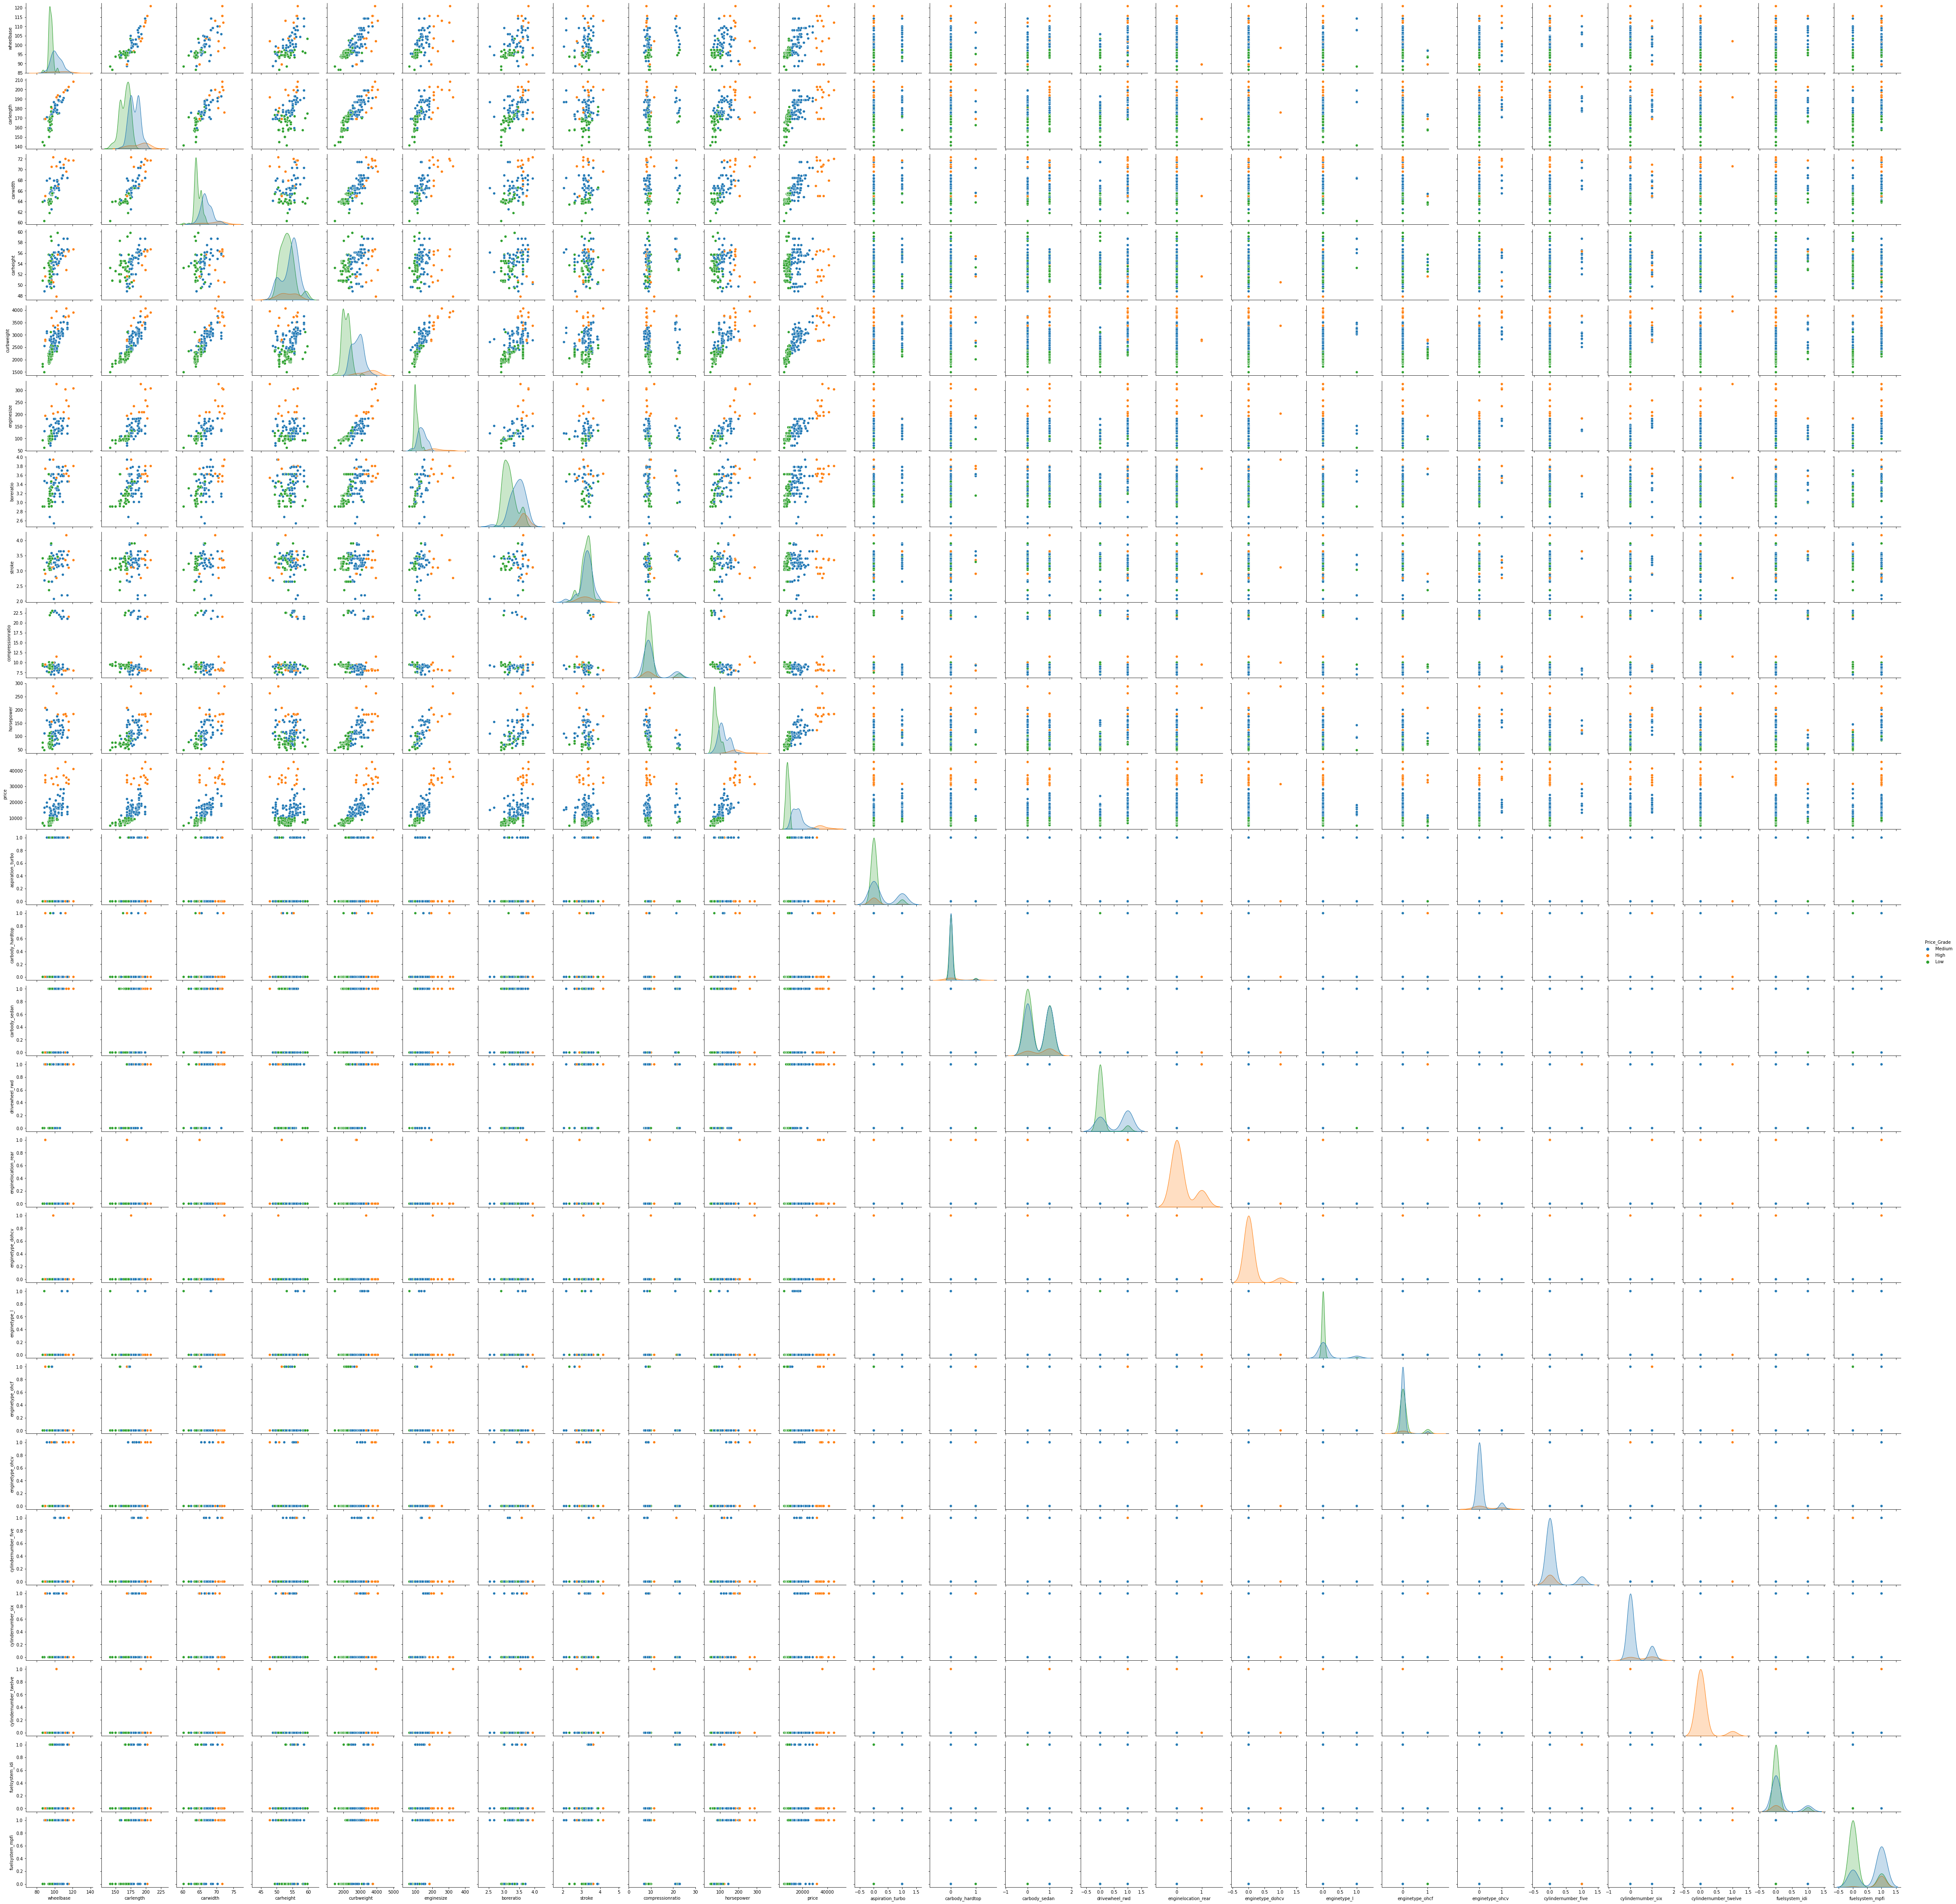

In [9]:
import seaborn as sns
sns.pairplot(data=final_cardf, hue = 'Price_Grade')

## Notes
High price grade are forming different clusters than others.

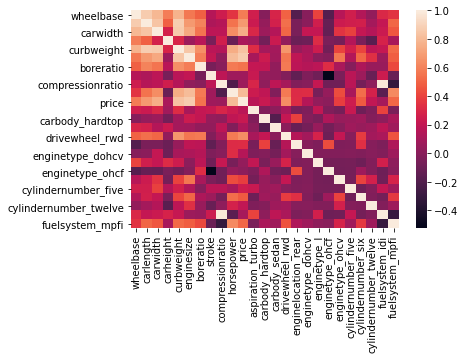

In [10]:
import matplotlib.pyplot as plt
sns.heatmap(final_cardf.corr())
plt.savefig("one.png")

In [11]:
#Split into train and test sets (70% and 30%)
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(final_cardf, test_size=0.3, random_state=42)

In [12]:
target = train_set['Price_Grade']
target

177    Medium
75     Medium
174    Medium
31        Low
12     Medium
        ...  
106    Medium
14     Medium
92        Low
179    Medium
102    Medium
Name: Price_Grade, Length: 143, dtype: object

In [13]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)
target

array([2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2])

In [14]:
train_set['Target'] = target

<ipython-input-14-b6f873c5055c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Target'] = target


In [15]:
train_set

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_l,enginetype_ohcf,enginetype_ohcv,cylindernumber_five,cylindernumber_six,cylindernumber_twelve,fuelsystem_idi,fuelsystem_mpfi,Price_Grade,Target
177,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92,...,0,0,0,0,0,0,0,1,Medium,2
75,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,175,...,0,0,0,0,0,0,0,1,Medium,2
174,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.5,73,...,0,0,0,0,0,0,1,0,Medium,2
31,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76,...,0,0,0,0,0,0,0,0,Low,1
12,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,121,...,0,0,0,0,1,0,0,1,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160,...,0,0,1,0,1,0,0,1,Medium,2
14,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,...,0,0,0,0,1,0,0,1,Medium,2
92,94.5,165.3,63.8,54.5,1938,97,3.15,3.29,9.4,69,...,0,0,0,0,0,0,0,0,Low,1
179,102.9,183.5,67.7,52.0,3016,171,3.27,3.35,9.3,161,...,0,0,0,0,1,0,0,1,Medium,2


## Building the decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
X = train_set.drop(columns=['Price_Grade','price','Target'])
y = train_set['Target']

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X,y)

DecisionTreeClassifier()

## Evaluation  (Confusion Matrix)
Create and display the confusion matrix for the training set. 

In [17]:
from sklearn.metrics import confusion_matrix
y_predicted = tree_classifier.predict(X)
matrix = confusion_matrix(y, y_predicted)
print(matrix)

[[11  0  0]
 [ 0 66  0]
 [ 0  1 65]]


## Evaluation (Other metrics)
Compute Accuracy, Precision, Sensitivity and F1 scores from the training data

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(y, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y, y_predicted, average="weighted"))

Accuracy is  0.993006993006993
Precision is  0.9931113662456946
Sensitivity is  0.993006993006993
F1 is  0.9930065916405812


## Displaying the decision tree
Export the decision tree to "balance.dot".

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(tree_classifier, out_file="balance.dot")

1. Total there are 28 nodes.
1. First split in the sample is [11, 66, 66]
1. Total leaf nodes are 14
 

## Cross Validate the model.  
We will do a 5 fold validation and compute each of our metrics
from sklearn.model_selection


In [20]:
from sklearn.model_selection import KFold
validation_accuracy = []
validation_f1 =[]
fold_and_validate = KFold(n_splits=5, shuffle=True, random_state=145)
for train_set_indices, validation_set_indices in fold_and_validate.split(X):
    cv_train_set = X.iloc[train_set_indices]
    cv_train_target = y.iloc[train_set_indices]
    #print(cv_train_set)
    
    cv_decision_tree = DecisionTreeClassifier()
    cv_decision_tree.fit(cv_train_set, cv_train_target)
    
    cv_xvalidation = X.iloc[validation_set_indices]
    cv_y_true = y.iloc[validation_set_indices]
    cv_y_predicted = cv_decision_tree.predict(cv_xvalidation)
    
    cv_accuracy_score = accuracy_score(cv_y_true, cv_y_predicted)
    cv_f1_score = f1_score(cv_y_true, cv_y_predicted,  average="weighted")
    validation_accuracy.append(cv_accuracy_score)
    validation_f1.append(cv_f1_score)
    
print("Cross validation accuracies are: ", validation_accuracy)
print("Cross validation f1 scores  are: ", validation_f1)

Cross validation accuracies are:  [0.9310344827586207, 0.7931034482758621, 0.896551724137931, 0.8928571428571429, 0.8928571428571429]
Cross validation f1 scores  are:  [0.9312239484653277, 0.7931034482758621, 0.8927203065134101, 0.893015873015873, 0.8919704433497537]


These are good, but not quite as good as before.  We definitely had overfitting occurring

## Building the SVM classifier
### 1. Kernel - Linear

In [21]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel="linear")
svm_classifier.fit(X,y)

SVC(kernel='linear')

### Evaluation 
We have the full range of metrics we can choose from.  We can do a confusion matrix, accuracy, precision, sensitivity, F1, and G scores.

Accuracy can be artificially high if we have uneven numbers of instances in each of the classifications, so an F1 score is often preferred.

The first step in finding the metric is to have a set of predicted values and the corresponding true values. 

In [22]:
from sklearn.metrics import confusion_matrix
y_predicted = svm_classifier.predict(X)
matrix = confusion_matrix(y, y_predicted)
print(matrix)

[[11  0  0]
 [ 0 62  4]
 [ 1  6 59]]


Compared with the decision tree, this seems to be similar to the performance using cross validation..

As long as we are looking at metrics, lets compute the accuracy, precision, recall(sensitivity) and F1

The metrics default to using the formulas we gave for a binary classifier.  Since we are using a multilable classifier, we need to specify how to combine the scores for the individual classifications.  

Micro - Count FP, FN over all classes
Macro - Count FP, FN and compute the score for each class and average.
Weighted - Count like macro and then do an average weighted by the True Positives for each classification.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(y, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y, y_predicted, average="weighted"))

Accuracy is  0.9230769230769231
Precision is  0.9235617323852616
Sensitivity is  0.9230769230769231
F1 is  0.9228563567787569


In [24]:
target_test = test_set['Price_Grade']

# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_test = le.fit_transform(target_test)
test_set['Target'] = target_test
Xtest=test_set.drop(columns=['Price_Grade','price','Target'])
ytest = test_set['Target']

<ipython-input-24-dc5285a095ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Target'] = target_test


### Test set Evaluation

In [25]:
svm_classifier = SVC(kernel="linear")
svm_classifier.fit(Xtest,ytest)
y_predictedtest = svm_classifier.predict(Xtest)
matrix = confusion_matrix(ytest, y_predictedtest)
print(matrix)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(ytest, y_predictedtest))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(ytest, y_predictedtest, average="weighted"))
print ("Sensitivity is ", recall_score(ytest, y_predictedtest, average="weighted"))
print ("F1 is ", f1_score(ytest, y_predictedtest, average="weighted"))


[[ 4  0  0]
 [ 0 34  0]
 [ 0  0 24]]
Accuracy is  1.0
Precision is  1.0
Sensitivity is  1.0
F1 is  1.0


### Cross Validate the SVM linear model.  


In [26]:
from sklearn.model_selection import KFold
validation_accuracy = []
validation_f1 =[]
fold_and_validate = KFold(n_splits=5, shuffle=True, random_state=145)
for train_set_indices, validation_set_indices in fold_and_validate.split(X):
    cv_train_set = X.iloc[train_set_indices]
    cv_train_target = y.iloc[train_set_indices]
    #print(cv_train_set)
    
    cv_svc = SVC()
    cv_svc.fit(cv_train_set, cv_train_target)
    
    cv_xvalidation = X.iloc[validation_set_indices]
    cv_y_true = y.iloc[validation_set_indices]
    cv_y_predicted = cv_svc.predict(cv_xvalidation)
    
    cv_accuracy_score = accuracy_score(cv_y_true, cv_y_predicted)
    cv_f1_score = f1_score(cv_y_true, cv_y_predicted,  average="weighted")
    validation_accuracy.append(cv_accuracy_score)
    validation_f1.append(cv_f1_score)
    
print("Cross validation accuracies are: ", validation_accuracy)
print("Cross validation f1 scores  are: ", validation_f1)

Cross validation accuracies are:  [0.7586206896551724, 0.7241379310344828, 0.7931034482758621, 0.8928571428571429, 0.8214285714285714]
Cross validation f1 scores  are:  [0.7255912273748184, 0.6735632183908047, 0.7632183908045976, 0.8869565217391305, 0.8068783068783069]


### 2. Kernel - RBF

In [27]:
svm_classifier = SVC(kernel="rbf")
svm_classifier.fit(X,y)

SVC()

### Evaluation

In [28]:
y_predicted1 = svm_classifier.predict(X)
matrix = confusion_matrix(y, y_predicted1)
print(matrix)

[[ 2  0  9]
 [ 0 61  5]
 [ 0 15 51]]


In [29]:
print ("Accuracy is ", accuracy_score(y, y_predicted1))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(y, y_predicted1, average="weighted"))
print ("Sensitivity is ", recall_score(y, y_predicted1, average="weighted"))
print ("F1 is ", f1_score(y, y_predicted1, average="weighted"))

Accuracy is  0.7972027972027972
Precision is  0.8094985985674246
Sensitivity is  0.7972027972027972
F1 is  0.7795675084883028


In [30]:
svm_classifier = SVC(kernel="rbf")
svm_classifier.fit(Xtest,ytest)
y_predictedtest = svm_classifier.predict(Xtest)
matrix = confusion_matrix(ytest, y_predictedtest)
print(matrix)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(ytest, y_predictedtest))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(ytest, y_predictedtest, average="weighted"))
print ("Sensitivity is ", recall_score(ytest, y_predictedtest, average="weighted"))
print ("F1 is ", f1_score(ytest, y_predictedtest, average="weighted"))


[[ 0  0  4]
 [ 0 34  0]
 [ 0  5 19]]
Accuracy is  0.8548387096774194
Precision is  0.7978566547991514
Sensitivity is  0.8548387096774194
F1 is  0.8237981967074398


C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Test set Evaluation

### Cross validate RBF SVM
5 fold cross validation on a SVC model with an RBF kernel using the same features and target as in the BaseLine. Compute and display metrics as before.

In [31]:
from sklearn.model_selection import KFold
validation_accuracy = []
validation_f1 =[]
fold_and_validate = KFold(n_splits=5, shuffle=True, random_state=145)
for train_set_indices, validation_set_indices in fold_and_validate.split(X):
    cv_train_set = X.iloc[train_set_indices]
    cv_train_target = y.iloc[train_set_indices]
    #print(cv_train_set)
    
    cv_svc = SVC()
    cv_svc.fit(cv_train_set, cv_train_target)
    
    cv_xvalidation = X.iloc[validation_set_indices]
    cv_y_true = y.iloc[validation_set_indices]
    cv_y_predicted = cv_svc.predict(cv_xvalidation)
    
    cv_accuracy_score = accuracy_score(cv_y_true, cv_y_predicted)
    cv_f1_score = f1_score(cv_y_true, cv_y_predicted,  average="weighted")
    validation_accuracy.append(cv_accuracy_score)
    validation_f1.append(cv_f1_score)
    
print("Cross validation accuracies are: ", validation_accuracy)
print("Cross validation f1 scores  are: ", validation_f1)

Cross validation accuracies are:  [0.7586206896551724, 0.7241379310344828, 0.7931034482758621, 0.8928571428571429, 0.8214285714285714]
Cross validation f1 scores  are:  [0.7255912273748184, 0.6735632183908047, 0.7632183908045976, 0.8869565217391305, 0.8068783068783069]


### 3. Kernel - Polynomial

In [32]:
svm_classifier = SVC(kernel="poly")
svm_classifier.fit(X,y)

SVC(kernel='poly')

### Evaluation

In [33]:
y_predicted1 = svm_classifier.predict(X)
matrix = confusion_matrix(y, y_predicted1)
print(matrix)

[[ 8  0  3]
 [ 0 61  5]
 [ 0 16 50]]


In [34]:
print ("Accuracy is ", accuracy_score(y, y_predicted1))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(y, y_predicted1, average="weighted"))
print ("Sensitivity is ", recall_score(y, y_predicted1, average="weighted"))
print ("F1 is ", f1_score(y, y_predicted1, average="weighted"))


Accuracy is  0.8321678321678322
Precision is  0.8404354266423232
Sensitivity is  0.8321678321678322
F1 is  0.8307458507275668


### Test set Evaluation

In [35]:
svm_classifier = SVC(kernel="poly")
svm_classifier.fit(Xtest,ytest)
y_predictedtest = svm_classifier.predict(Xtest)
matrix = confusion_matrix(ytest, y_predictedtest)
print(matrix)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(ytest, y_predictedtest))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(ytest, y_predictedtest, average="weighted"))
print ("Sensitivity is ", recall_score(ytest, y_predictedtest, average="weighted"))
print ("F1 is ", f1_score(ytest, y_predictedtest, average="weighted"))


C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 0  0  4]
 [ 0 34  0]
 [ 0  5 19]]
Accuracy is  0.8548387096774194
Precision is  0.7978566547991514
Sensitivity is  0.8548387096774194
F1 is  0.8237981967074398


### Cross Validate SVM polynomial

In [36]:
from sklearn.model_selection import KFold
validation_accuracy = []
validation_f1 =[]
fold_and_validate = KFold(n_splits=5, shuffle=True, random_state=145)
for train_set_indices, validation_set_indices in fold_and_validate.split(X):
    cv_train_set = X.iloc[train_set_indices]
    cv_train_target = y.iloc[train_set_indices]
    #print(cv_train_set)
    
    cv_svc = SVC(kernel="poly")
    cv_svc.fit(cv_train_set, cv_train_target)
    
    cv_xvalidation = X.iloc[validation_set_indices]
    cv_y_true = y.iloc[validation_set_indices]
    cv_y_predicted = cv_svc.predict(cv_xvalidation)
    
    cv_accuracy_score = accuracy_score(cv_y_true, cv_y_predicted)
    cv_f1_score = f1_score(cv_y_true, cv_y_predicted,  average="weighted")
    validation_accuracy.append(cv_accuracy_score)
    validation_f1.append(cv_f1_score)
    
print("Cross validation accuracies are: ", validation_accuracy)
print("Cross validation f1 scores  are: ", validation_f1)

Cross validation accuracies are:  [0.7931034482758621, 0.7931034482758621, 0.8620689655172413, 0.8571428571428571, 0.8571428571428571]
Cross validation f1 scores  are:  [0.7863044605018445, 0.794088669950739, 0.860919540229885, 0.8498813014942047, 0.8571428571428571]


### 4. Kernel - Sigmoid

In [37]:
svm_classifier = SVC(kernel="sigmoid")
svm_classifier.fit(X,y)

SVC(kernel='sigmoid')

### Evaluation

In [38]:
y_predicted1 = svm_classifier.predict(X)
matrix = confusion_matrix(y, y_predicted1)
print(matrix)

[[ 0  9  2]
 [ 0  1 65]
 [ 0 38 28]]


In [39]:
print ("Accuracy is ", accuracy_score(y, y_predicted1))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(y, y_predicted1, average="weighted"))
print ("Sensitivity is ", recall_score(y, y_predicted1, average="weighted"))
print ("F1 is ", f1_score(y, y_predicted1, average="weighted"))

Accuracy is  0.20279720279720279
Precision is  0.14564777327935222
Sensitivity is  0.20279720279720279
F1 is  0.16863228304875902


C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Test set Evaluation

In [40]:
svm_classifier = SVC(kernel="sigmoid")
svm_classifier.fit(Xtest,ytest)
y_predictedtest = svm_classifier.predict(Xtest)
matrix = confusion_matrix(ytest, y_predictedtest)
print(matrix)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(ytest, y_predictedtest))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(ytest, y_predictedtest, average="weighted"))
print ("Sensitivity is ", recall_score(ytest, y_predictedtest, average="weighted"))
print ("F1 is ", f1_score(ytest, y_predictedtest, average="weighted"))


[[ 0  4  0]
 [ 0 34  0]
 [ 0 24  0]]
Accuracy is  0.5483870967741935
Precision is  0.3007284079084287
Sensitivity is  0.5483870967741935
F1 is  0.38844086021505375


C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Cross validate sigmoid SVM

In [41]:
from sklearn.model_selection import KFold
validation_accuracy = []
validation_f1 =[]
fold_and_validate = KFold(n_splits=5, shuffle=True, random_state=145)
for train_set_indices, validation_set_indices in fold_and_validate.split(X):
    cv_train_set = X.iloc[train_set_indices]
    cv_train_target = y.iloc[train_set_indices]
    #print(cv_train_set)
    
    cv_svc = SVC()
    cv_svc.fit(cv_train_set, cv_train_target)
    
    cv_xvalidation = X.iloc[validation_set_indices]
    cv_y_true = y.iloc[validation_set_indices]
    cv_y_predicted = cv_svc.predict(cv_xvalidation)
    
    cv_accuracy_score = accuracy_score(cv_y_true, cv_y_predicted)
    cv_f1_score = f1_score(cv_y_true, cv_y_predicted,  average="weighted")
    validation_accuracy.append(cv_accuracy_score)
    validation_f1.append(cv_f1_score)
    
print("Cross validation accuracies are: ", validation_accuracy)
print("Cross validation f1 scores  are: ", validation_f1)

Cross validation accuracies are:  [0.7586206896551724, 0.7241379310344828, 0.7931034482758621, 0.8928571428571429, 0.8214285714285714]
Cross validation f1 scores  are:  [0.7255912273748184, 0.6735632183908047, 0.7632183908045976, 0.8869565217391305, 0.8068783068783069]


## Comparing the results

| Linear  |RBF   |Polynomial   |Sigmoid   |   |
|---|---|---|---|---|
| Accuracy is  0.9230769230769231|Accuracy is  0.7972027972027972|Accuracy is  0.8321678321678322|Accuracy is 0.20279720279720279|
|Precision is  0.9235617323852616|Precision is  0.8094985985674246|Precision is  0.8404354266423232|Precision is  0.14564777327935222|
|Sensitivity is  0.9230769230769231|Sensitivity is  0.797202797202797|Sensitivity is  0.8321678321678322|Sensitivity is  0.20279720279720279|
|F1 is  0.9228563567787569  |F1 is  0.7795675084883028|F1 is  0.8307458507275668|F1 is  0.16863228304875902|


Among all kernels Linear kernel having best results followed by polynomial kernel. Also in test evaluation linear and polynomial kernel gave best accuracy values. 

So overall linear kernel SVM gave best accuracy values.